# **Logistic Regression**

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading datasets
#train data and test data
train1=pd.read_csv('Titanic_train.csv')
test1=pd.read_csv('Titanic_test.csv')

## EDA

In [4]:
# Viewing training data and different features
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train1.shape

(891, 12)

In [6]:
train1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# printing all the values and counts for each variable

import pandas as pd

df = pd.read_csv('Titanic_train.csv')

for column in df.columns:
  print(f"Values and counts for column '{column}':")
  print(df[column].value_counts())
  print("\n")

Values and counts for column 'PassengerId':
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


Values and counts for column 'Survived':
Survived
0    549
1    342
Name: count, dtype: int64


Values and counts for column 'Pclass':
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Values and counts for column 'Name':
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Values and counts 

**Based on analysis**

Continuos variables are**:** **Age, Fare**

Discrete variables are**:** **PassengerId, Survived, Pclass, SibSp, Parch**

Catrgorical variables are**:** **Name, Sex, Ticket, Cabin, Embarked**

In [9]:
# Statistical analysis
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Finding null values
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values are present in **Age, Cabin, Embarked.**

In [11]:
# Check for duplicates
if(train1.duplicated().sum() != 0):
    print("DUPLICATES ARE PRESENT")
    print("No.of duplicated rows: ",train1.duplicated().sum())
else:
    print("NO DUPLICATES")

# Print duplicated values
train1[train1.duplicated(keep = False)]

NO DUPLICATES


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Data Visualization

In [12]:
train_cont=train1.drop(train1.columns[[0,1,2,3,4,6,7,8,10,11]],axis=1)
train_cont

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


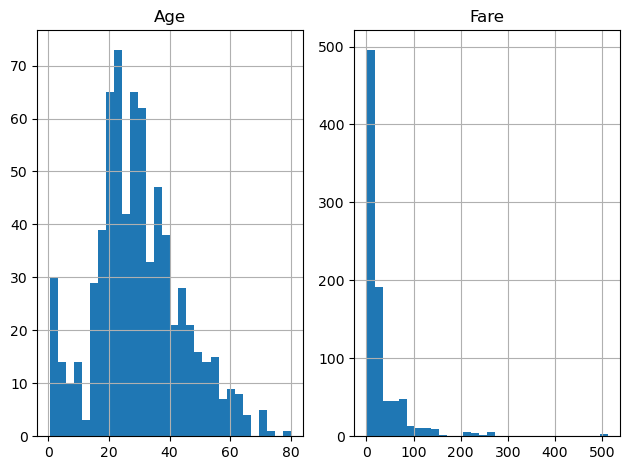

In [68]:
# histograms of continuos variables

import matplotlib.pyplot as plt
train_cont.hist(bins=30, layout=(1, len(train_cont.columns)))
plt.tight_layout()
plt.show()

In [14]:
train_dis=train1.drop(train1.columns[[3,4,5,8,9,10,11]],axis=1)
train_dis

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


<Figure size 640x480 with 0 Axes>

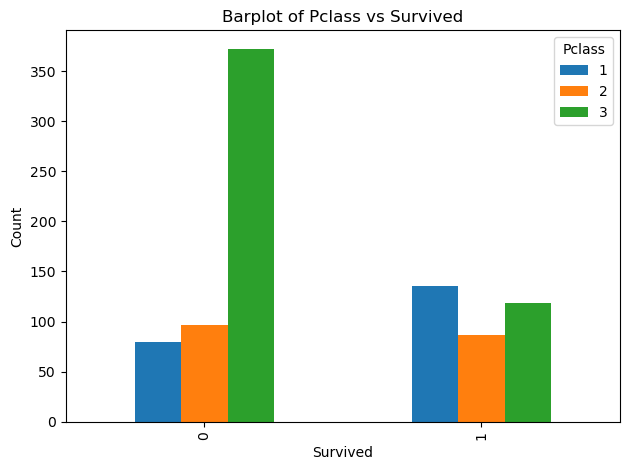

<Figure size 640x480 with 0 Axes>

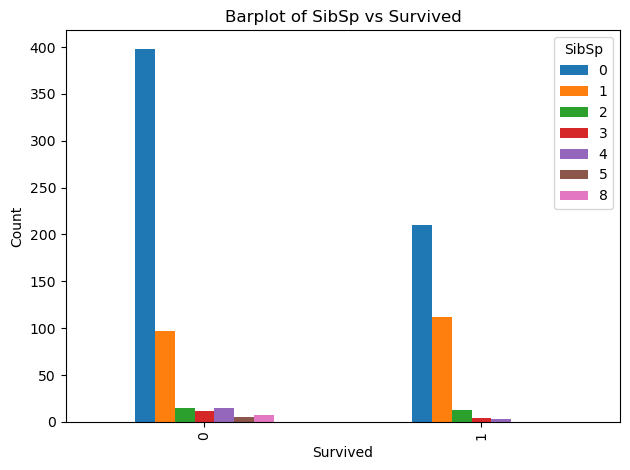

<Figure size 640x480 with 0 Axes>

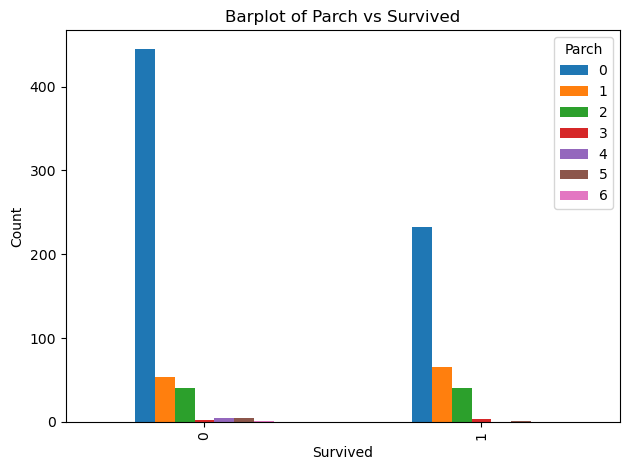

In [69]:
#  barplots of variables against survived variable

import matplotlib.pyplot as plt

# Iterate through columns except 'Survived' and 'PassengerId'
for column in train_dis.columns:
    if column not in ['Survived', 'PassengerId']:
        plt.figure()  # Create a new figure for each plot
        train_dis.groupby(['Survived'])[column].value_counts().unstack().plot(kind='bar')
        plt.title(f'Barplot of {column} vs Survived')
        plt.xlabel('Survived')
        plt.ylabel('Count')
        plt.tight_layout()

plt.show()

In [16]:
train_cat=train1.drop(train1.columns[[0,2,5,6,7,9]],axis=1)
train_cat

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",male,211536,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,1,"Behr, Mr. Karl Howell",male,111369,C148,C


<Figure size 640x480 with 0 Axes>

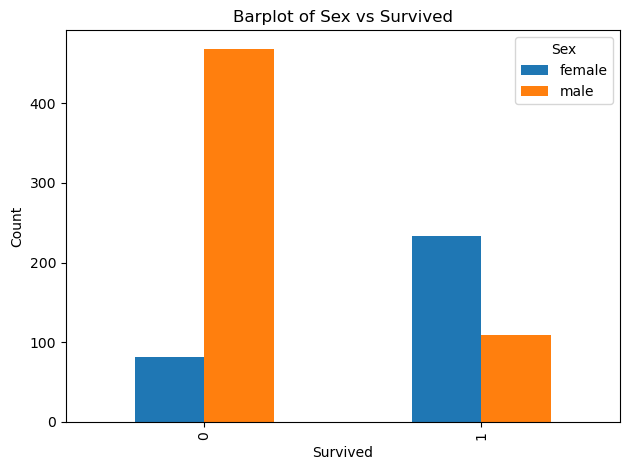

<Figure size 640x480 with 0 Axes>

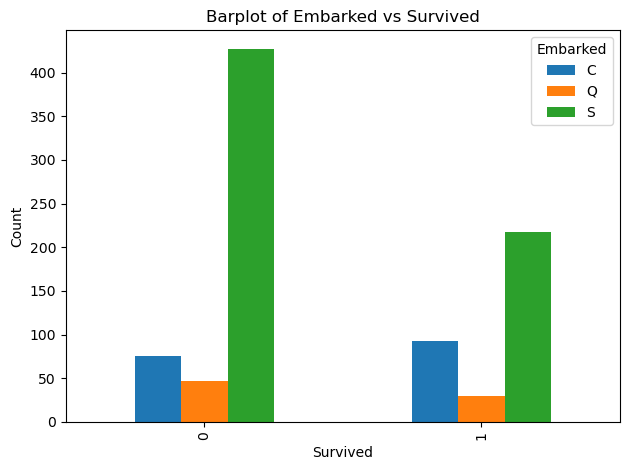

In [70]:
# bargraphs for Sex and Embarked variables against Survived

# Iterate through columns 'Sex' and 'Embarked'
for column in ['Sex', 'Embarked']:
    plt.figure()  # Create a new figure for each plot
    train_cat.groupby(['Survived'])[column].value_counts().unstack().plot(kind='bar')
    plt.title(f'Barplot of {column} vs Survived')
    plt.xlabel('Survived')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

In [18]:
# Dropping Cabin due to large number of null values
train1.drop('Cabin', axis=1, inplace=True)

In [19]:
# fill the null values in Age with its mean

# Calculate the mean of the 'Age' column, ignoring NaN values
mean_age = train1['Age'].mean()

# Fill NaN values in the 'Age' column with the calculated mean
train1['Age'].fillna(mean_age, inplace=True)

# Verify that there are no more NaN values in the 'Age' column
print(train1['Age'].isnull().sum())

0


C:\Users\INDRANANDAM\AppData\Local\Temp\ipykernel_9484\2984515745.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train1['Age'].fillna(mean_age, inplace=True)


In [20]:
# Remove rows with null values in the 'Embarked' column
train1.dropna(subset=['Embarked'], inplace=True)

# Verify that there are no more NaN values in the 'Embarked' column
print(train1['Embarked'].isnull().sum())

0


In [21]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
noutlier=train1.drop(train1.columns[[0,1,2,3,4,5,8,9,10]],axis=1)
noutlier

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
886,0,0
887,0,0
888,1,2
889,0,0


In [23]:
outlier=train1.drop(train1.columns[[6,7]],axis=1)
outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C


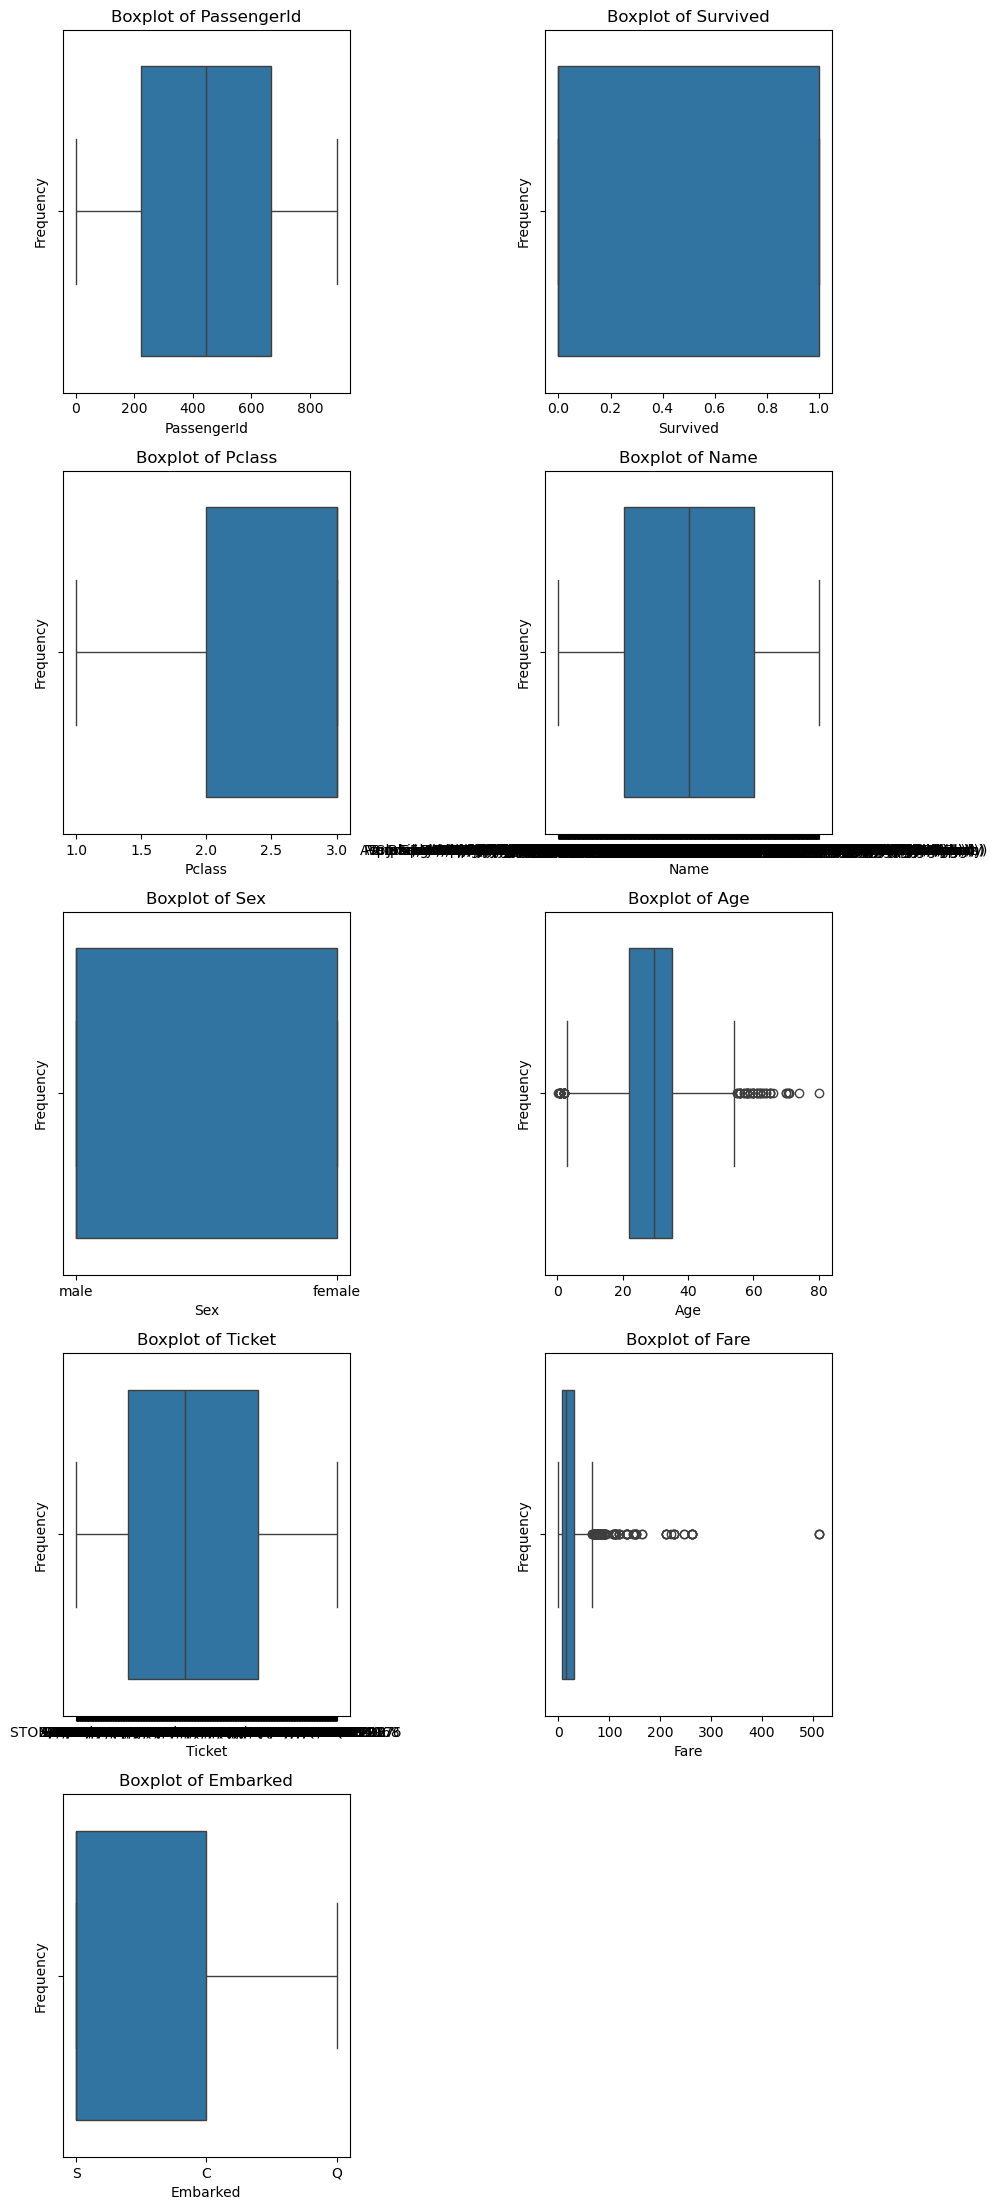

In [24]:
# BOXPLOT TO CHECK OUTLIERS
plt.figure(figsize = (10,35))
for i, column in enumerate( outlier,1):
    plt.subplot(8,2,i)
    sns.boxplot(x = outlier[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Outliers are present in **Age and Fare.**

In [25]:
# Capping outliers
import pandas as pd
import numpy as np

# function to detect and cap outliers using IQR method
def cap_outliers_iqr(outlier, column):
    Q1 = outlier[column].quantile(0.25)
    Q3 = outlier[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier[column] = np.where(outlier[column] < lower_bound, lower_bound, outlier[column])
    outlier[column] = np.where(outlier[column] > upper_bound, upper_bound, outlier[column])
    return outlier

# Iterate through numerical columns and cap outliers
for column in outlier.select_dtypes(include=np.number).columns:
    outlier = cap_outliers_iqr(outlier, column)

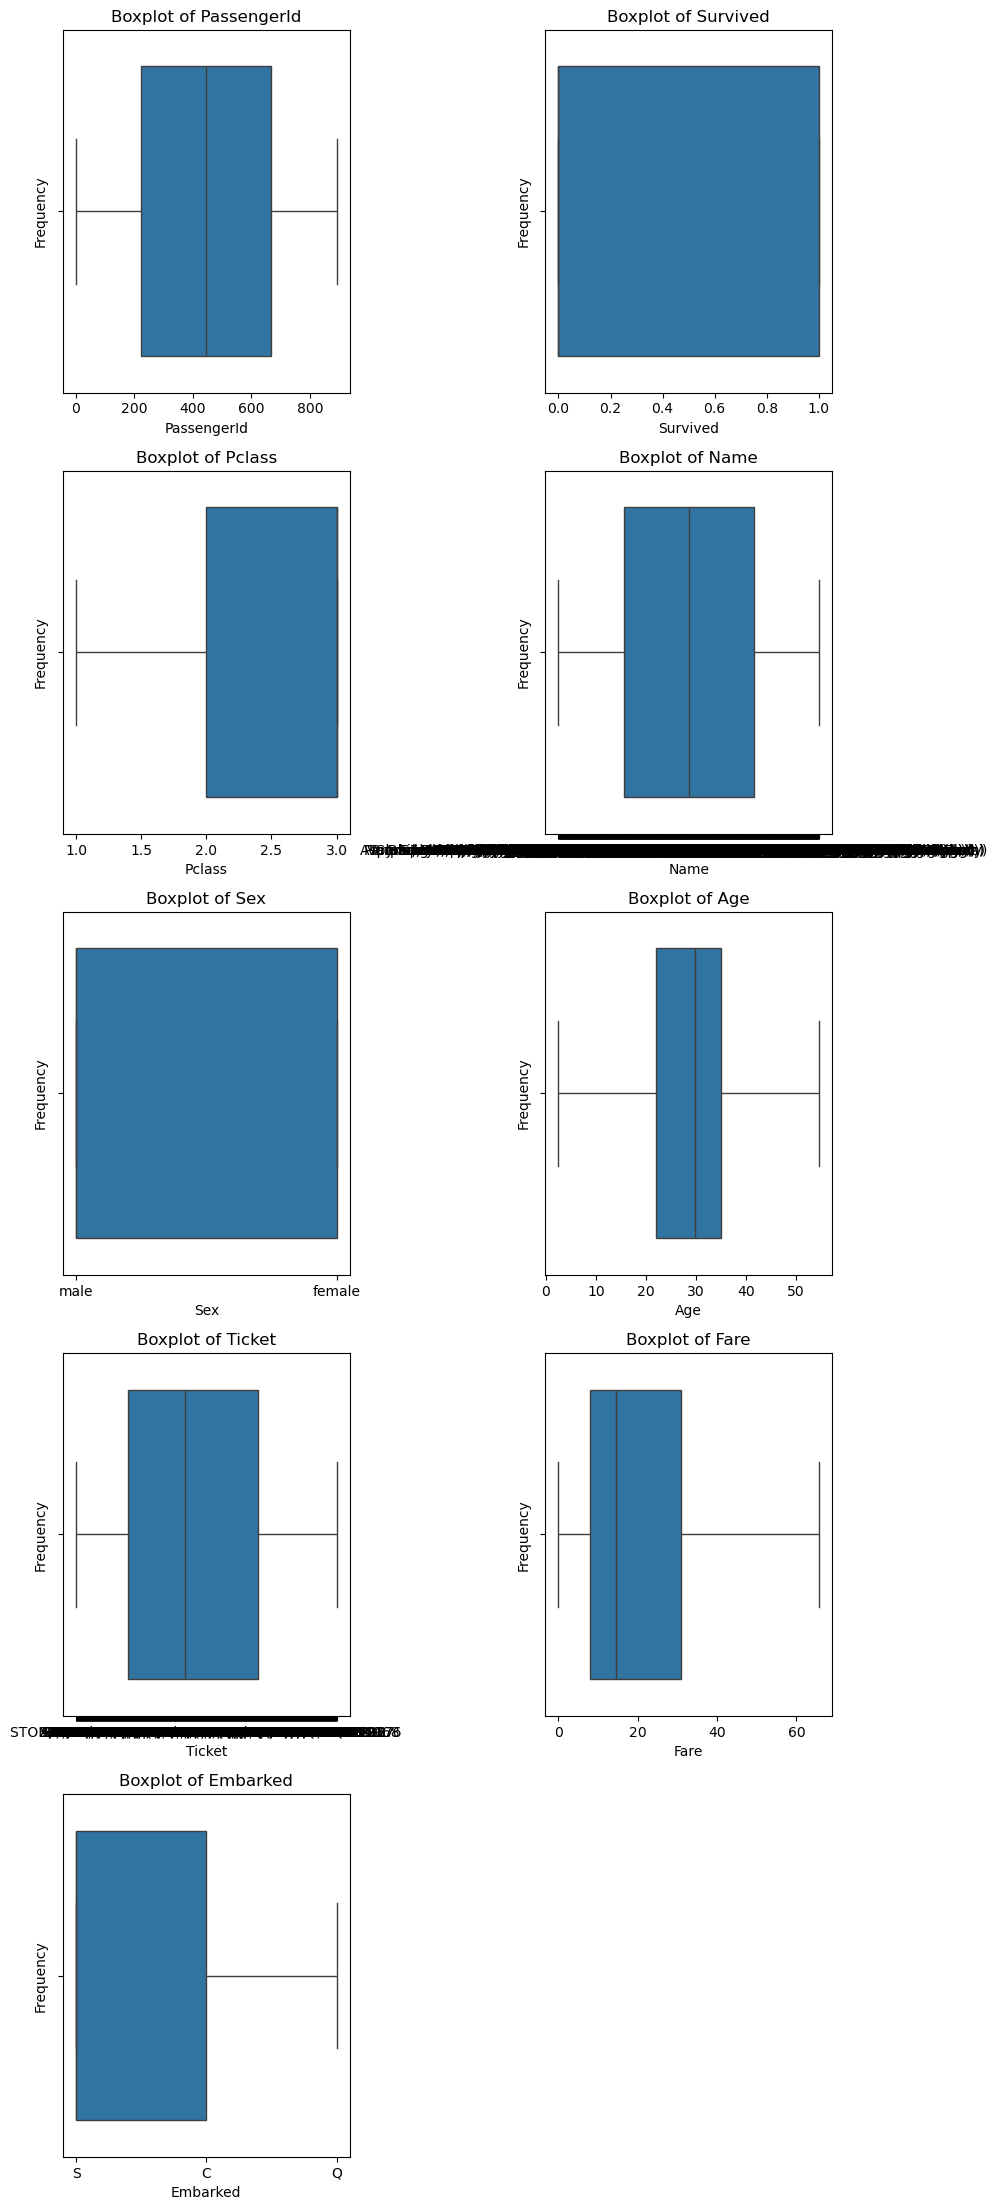

In [26]:
# BOXPLOT to check outliers
plt.figure(figsize = (10,35))
for i, column in enumerate( outlier,1):
    plt.subplot(8,2,i)
    sns.boxplot(x = outlier[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

No outliers are present

In [27]:
outlier.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,65.6563,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S


In [28]:
train=pd.concat([outlier,noutlier,],axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,SibSp,Parch
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,1,0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,65.6563,C,1,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0,0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,1,0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,0,0
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,0,0
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S,1,2
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,0,0


In [29]:
# drop PassengerId ,Name and Ticket variables from train dataset
train = train.drop(['PassengerId','Name','Ticket'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,0.0,3.0,male,22.0,7.2500,S,1,0
1,1.0,1.0,female,38.0,65.6563,C,1,0
2,1.0,3.0,female,26.0,7.9250,S,0,0
3,1.0,1.0,female,35.0,53.1000,S,1,0
4,0.0,3.0,male,35.0,8.0500,S,0,0


## Data Preprocesing

In [30]:
# label encode Sex and Embarked variables

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through the columns 'Sex' and 'Embarked'
for column in ['Sex', 'Embarked']:
    # Fit and transform the column using LabelEncoder
    train[column] = le.fit_transform(train[column])
# Print the updated DataFrame
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,0.0,3.0,1,22.0,7.2500,2,1,0
1,1.0,1.0,0,38.0,65.6563,0,1,0
2,1.0,3.0,0,26.0,7.9250,2,0,0
3,1.0,1.0,0,35.0,53.1000,2,1,0
4,0.0,3.0,1,35.0,8.0500,2,0,0


In [31]:
# display the counts of variables Pclass,Parch,SibSp,Embarked variables

# Display the counts for Pclass, Parch, and Embarked variables
print("Counts for Pclass:")
print(train['Pclass'].value_counts())
print("\n")

print("Counts for Parch:")
print(train['Parch'].value_counts())
print("\n")

print("Counts for SibSp:")
print(train['SibSp'].value_counts())
print("\n")

print("Counts for Embarked:")
print(train['Embarked'].value_counts())

Counts for Pclass:
Pclass
3.0    491
1.0    214
2.0    184
Name: count, dtype: int64


Counts for Parch:
Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


Counts for SibSp:
SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


Counts for Embarked:
Embarked
2    644
0    168
1     77
Name: count, dtype: int64


In [32]:
train.shape

(889, 8)

In [33]:
# standardize Age and Fare variables

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the 'Age', 'Fare' columns
train[['Age', 'Fare',]] = scaler.fit_transform(train[['Age', 'Fare']])

# Print the updated DataFrame
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,0.0,3.0,1,-0.609751,-0.818784,2,1,0
1,1.0,1.0,0,0.719613,2.043778,0,1,0
2,1.0,3.0,0,-0.277410,-0.785701,2,0,0
3,1.0,1.0,0,0.470357,1.428379,2,1,0
4,0.0,3.0,1,0.470357,-0.779575,2,0,0


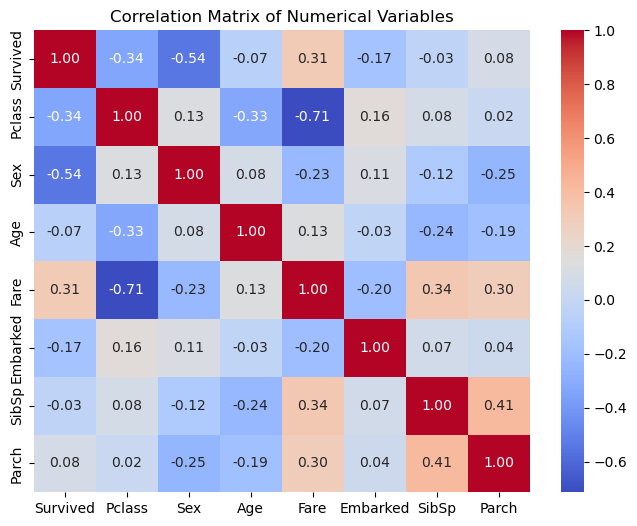

In [34]:
# plot the correlation matrix between all the numerical variables

# Create the correlation matrix
correlation_matrix = train.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Data Transformation and Model Fitting

In [35]:
# Defining X and Y
Y = train["Survived"]
X = train.drop(train[['Survived']],axis=1)
X.head()

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,3.0,1,-0.609751,-0.818784,2,1,0
1,1.0,0,0.719613,2.043778,0,1,0
2,3.0,0,-0.277410,-0.785701,2,0,0
3,1.0,0,0.470357,1.428379,2,1,0
4,3.0,1,0.470357,-0.779575,2,0,0


In [36]:
Y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [37]:
# data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.2)

df.shape
X_train.shape
print(X_test.shape)
Y_train
print(Y_test.shape)

(178, 7)
(178,)


In [38]:
# model fitting
import numpy as np
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)



In [39]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_train,Y_pred_train)
cm

array([[379,  62],
       [ 81, 189]], dtype=int64)

## Model Evaluation

In [40]:
#Evaluating training and test accuracies
traningscore = accuracy_score(Y_train,Y_pred_train)
print("training accuracy score:", np.round(traningscore,2))

testscore = accuracy_score(Y_test,Y_pred_test)
print("test accuracy score:", np.round(testscore,2))

training accuracy score: 0.8
test accuracy score: 0.79


In [41]:
### CROSS VALIDATION
## VALIDATION HOLD

training_acc=[]
test_acc=[]
for i in range (1,501):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3,random_state=i)
    model = LogisticRegression()
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("cross validation training accuracy:",np.round(np.mean(training_acc),2))
print("cross validation test accuracy:",np.round(np.mean(test_acc),2))

cross validation training accuracy: 0.8
cross validation test accuracy: 0.79


In [42]:
# finding sensitivity score and precision score
from sklearn.metrics import recall_score,precision_score,f1_score
sensitivity=recall_score(Y_test,Y_pred_test)
print("sensitivity score:",np.round(sensitivity,2))
precision=precision_score(Y_test,Y_pred_test)
print("precision score:",np.round(precision,2))

sensitivity score: 0.74
precision score: 0.73


In [43]:
# finding specificity score and F1 score
TN=cm[0,0]
FP=cm[0,1]
TNR=TN/(TN+FP)
print("specificity score:",np.round(TNR,2))
f1score=f1_score(Y_test,Y_pred_test)
print("F1 score:",np.round(f1score,2))

specificity score: 0.86
F1 score: 0.73


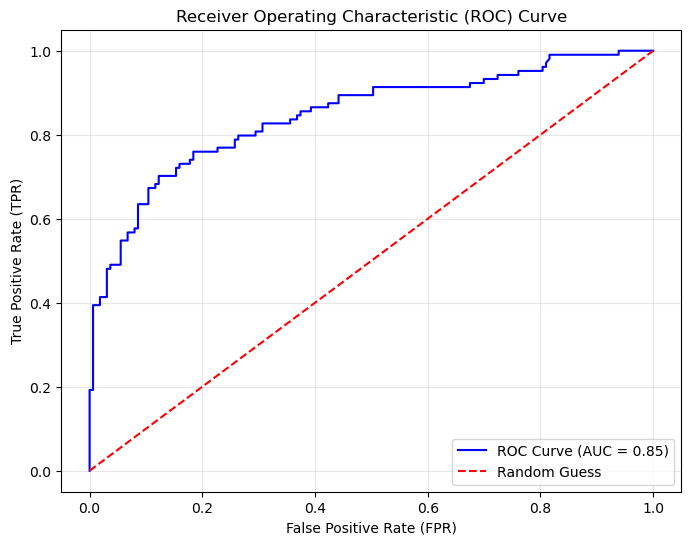

In [44]:
# Plotting the ROC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
Y_pred_test = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_test)

# Compute the AUC score
auc_score = roc_auc_score(Y_test, Y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# **Processing test data**

In [45]:
#Reading Test data
import pandas as pd
test1=pd.read_csv('Titanic_test.csv')
test1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [46]:
#Cleaning the data by removing irrelevant columns
test1=test1.drop(['PassengerId','Name','Cabin','Ticket'], axis=1)
test1


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [47]:
# label encode Sex and Embarked variables

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through the columns 'Sex' and 'Embarked'
for column in ['Sex', 'Embarked']:
  # Fit and transform the column using LabelEncoder
  test1[column] = le.fit_transform(test1[column])

# Print the updated DataFrame
test1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [48]:
#check for the null values
test1.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [49]:
# fill the null values in Age with its mean

# Calculate the mean of the 'Age' column, ignoring NaN values
mean_age = test1['Age'].mean()

# Fill NaN values in the 'Age' column with the calculated mean
test1['Age'].fillna(mean_age, inplace=True)

# Verify that there are no more NaN values in the 'Age' column
print(test1['Age'].isnull().sum())

0


C:\Users\INDRANANDAM\AppData\Local\Temp\ipykernel_9484\2492048045.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test1['Age'].fillna(mean_age, inplace=True)


In [50]:
#fill the null values in Fare with its mean
test1['Fare']=test1['Fare'].fillna(test1['Fare'].mean())

In [51]:
test1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [52]:
test1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [53]:
outlier1=test1.drop(test1.columns[[3,4]],axis=1)
outlier1

,Pclass,Sex,Age,Fare,Embarked
0,3,1,34.50000,7.8292,1
1,3,0,47.00000,7.0000,2
2,2,1,62.00000,9.6875,1
3,3,1,27.00000,8.6625,2
4,3,0,22.00000,12.2875,2
...,...,...,...,...,...
413,3,1,30.27259,8.0500,2
414,1,0,39.00000,108.9000,0
415,3,1,38.50000,7.2500,2
416,3,1,30.27259,8.0500,2


In [54]:
noutlier1=test1.drop(test1.columns[[0,1,2,5,6]],axis=1)
noutlier1

,SibSp,Parch
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,0,0
415,0,0
416,0,0


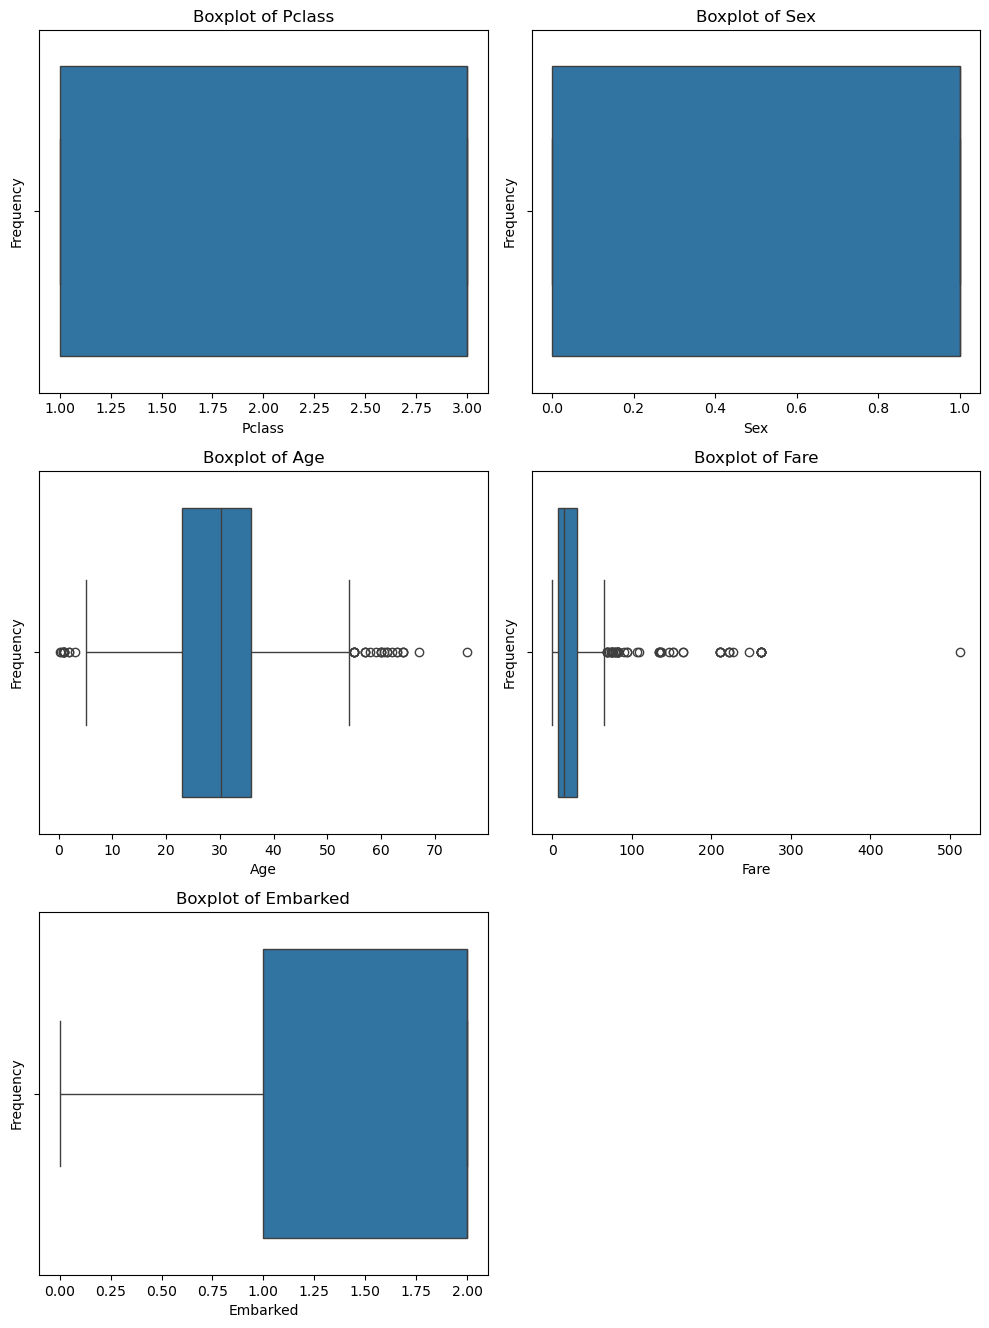

In [55]:
# BOXPLOT
plt.figure(figsize = (10,35))
for i, column in enumerate( outlier1,1):
    plt.subplot(8,2,i)
    sns.boxplot(x = outlier1[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Outliers are present in **Age and Fare.**

In [56]:
# Capping outliers

import pandas as pd
import numpy as np

# function to detect and cap outliers using IQR method
def cap_outliers_iqr(outlier1, column):
    Q1 = outlier1[column].quantile(0.25)
    Q3 = outlier1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier1[column] = np.where(outlier1[column] < lower_bound, lower_bound, outlier1[column])
    outlier1[column] = np.where(outlier1[column] > upper_bound, upper_bound, outlier1[column])
    return outlier1

# Iterate through numerical columns and cap outliers
for column in outlier1.select_dtypes(include=np.number).columns:
    outlier1 = cap_outliers_iqr(outlier1, column)

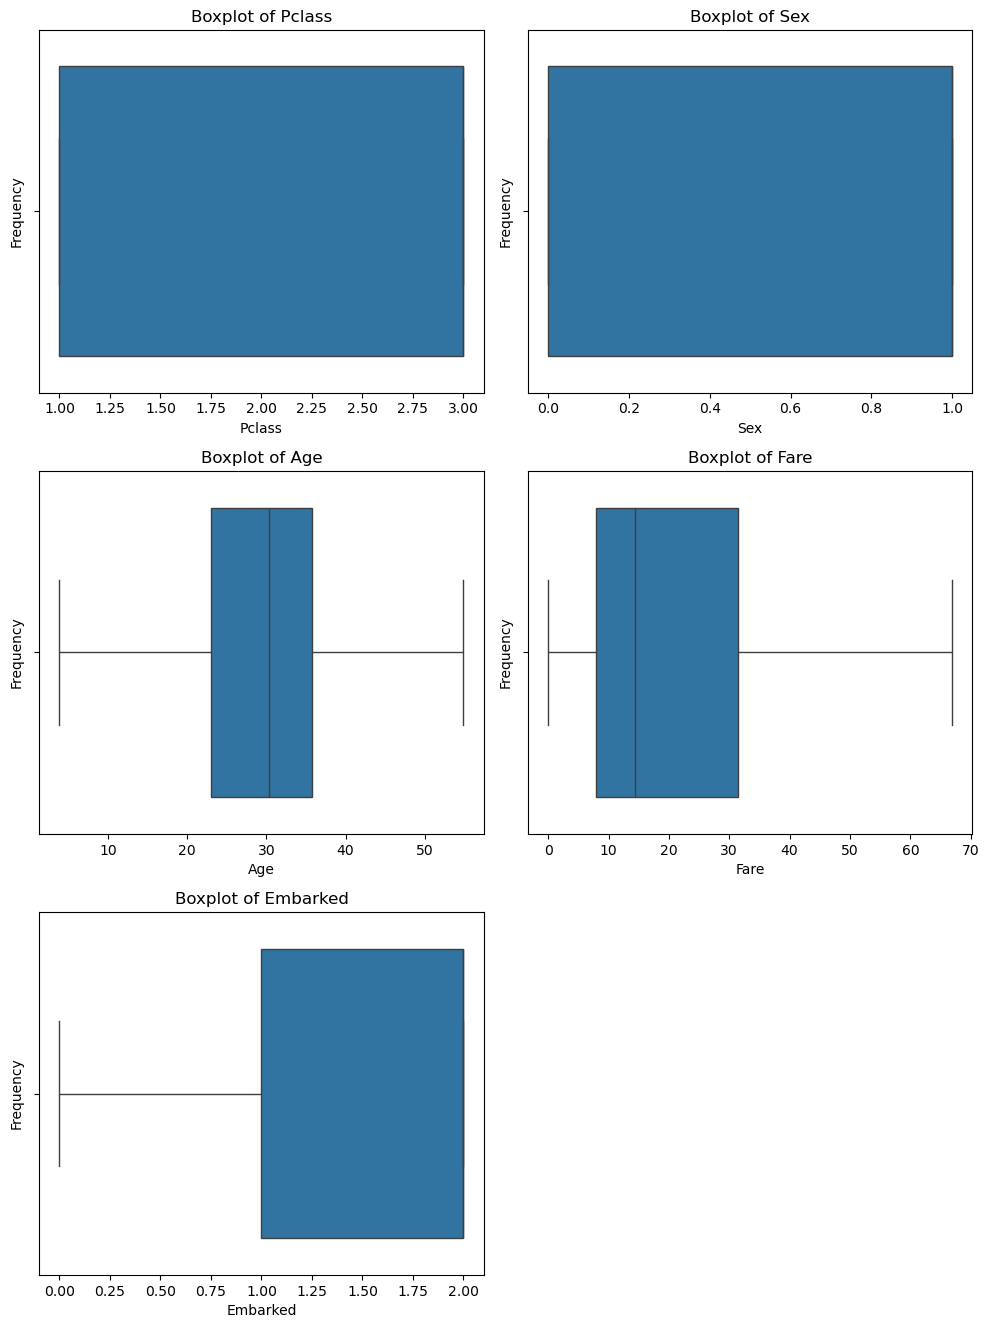

In [57]:
# BOXPLOT to check outliers
plt.figure(figsize = (10,35))
for i, column in enumerate( outlier1,1):
    plt.subplot(8,2,i)
    sns.boxplot(x = outlier1[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

No outliers are present

In [58]:
test=pd.concat([outlier1,noutlier1],axis=1)
test

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,3.0,1.0,34.50000,7.8292,1.0,0,0
1,3.0,0.0,47.00000,7.0000,2.0,1,0
2,2.0,1.0,54.87500,9.6875,1.0,0,0
3,3.0,1.0,27.00000,8.6625,2.0,0,0
4,3.0,0.0,22.00000,12.2875,2.0,1,1
...,...,...,...,...,...,...,...
413,3.0,1.0,30.27259,8.0500,2.0,0,0
414,1.0,0.0,39.00000,66.9063,0.0,0,0
415,3.0,1.0,38.50000,7.2500,2.0,0,0
416,3.0,1.0,30.27259,8.0500,2.0,0,0


In [59]:
# Save the DataFrame to a new CSV file
test.to_csv('new_test.csv', index=False) 

In [60]:
new_test=pd.read_csv('new_test.csv')
new_test

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,3.0,1.0,34.50000,7.8292,1.0,0,0
1,3.0,0.0,47.00000,7.0000,2.0,1,0
2,2.0,1.0,54.87500,9.6875,1.0,0,0
3,3.0,1.0,27.00000,8.6625,2.0,0,0
4,3.0,0.0,22.00000,12.2875,2.0,1,1
...,...,...,...,...,...,...,...
413,3.0,1.0,30.27259,8.0500,2.0,0,0
414,1.0,0.0,39.00000,66.9063,0.0,0,0
415,3.0,1.0,38.50000,7.2500,2.0,0,0
416,3.0,1.0,30.27259,8.0500,2.0,0,0


In [61]:
# standardize Age, Fare variables

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the 'Age', 'Fare' columns
test[['Age', 'Fare']] = scaler.fit_transform(test[['Age', 'Fare']])

# Print the updated DataFrame
test.head()

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,3.0,1.0,0.382366,-0.796470,1.0,0,0
1,3.0,0.0,1.451281,-0.835607,2.0,1,0
2,2.0,1.0,2.124697,-0.708760,1.0,0,0
3,3.0,1.0,-0.258983,-0.757139,2.0,0,0
4,3.0,0.0,-0.686549,-0.586042,2.0,1,1


# **Prediction using Test dataset**

In [62]:
prediction = model.predict(test)
prediction

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [63]:
import pandas as pd
test_pred=pd.read_csv('Titanic_test.csv')
test_pred

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [64]:
submission = pd.DataFrame({"PassengerId": test_pred["PassengerId"],
                            "Survived": prediction})
submission.to_csv('Prediction.csv', index=False)

In [65]:
# Linking PassengerId and Survived
prediction_df = pd.read_csv('Prediction.csv')
prediction_df

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


<Axes: xlabel='Survived', ylabel='count'>

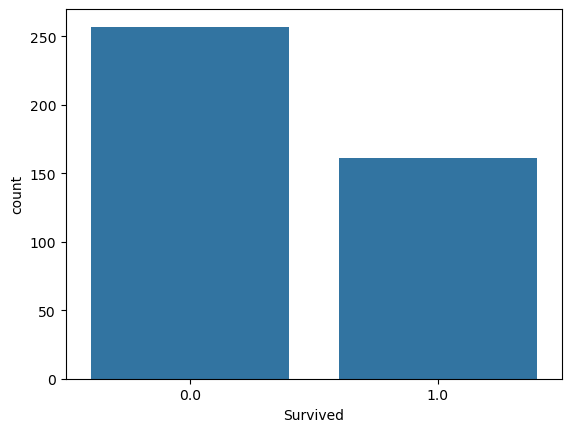

In [66]:
#Visualizing predicted values of Survival
sns.countplot(x='Survived', data=prediction_df)

In [67]:
# Getting the test file for Deployment

titanic_deploydata=pd.concat([prediction_df,new_test],axis=1)

# Making Survived the first column
passenger_id = titanic_deploydata['PassengerId']

# Remove the 'PassengerId' column from the original DataFrame
titanic_deploydata = titanic_deploydata.drop('PassengerId', axis=1)

# Insert the 'PassengerId' column as the second column
titanic_deploydata.insert(1, 'PassengerId', passenger_id)

# Display the modified DataFrame
titanic_deploydata

,Survived,PassengerId,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch
0,0.0,892,3.0,1.0,34.50000,7.8292,1.0,0,0
1,0.0,893,3.0,0.0,47.00000,7.0000,2.0,1,0
2,0.0,894,2.0,1.0,54.87500,9.6875,1.0,0,0
3,0.0,895,3.0,1.0,27.00000,8.6625,2.0,0,0
4,1.0,896,3.0,0.0,22.00000,12.2875,2.0,1,1
...,...,...,...,...,...,...,...,...,...
413,0.0,1305,3.0,1.0,30.27259,8.0500,2.0,0,0
414,1.0,1306,1.0,0.0,39.00000,66.9063,0.0,0,0
415,0.0,1307,3.0,1.0,38.50000,7.2500,2.0,0,0
416,0.0,1308,3.0,1.0,30.27259,8.0500,2.0,0,0


In [290]:
titanic_deploydata.to_csv('titanic_deploy_data.csv', index=False)